In [1]:
import pandas as pd
import plotly.express as px
import os 
import pickle
import numpy as np
from omegaconf import OmegaConf
import gym
from pheno_game.envs.pheno_env import PhenoEnvContinuous_v0


Setting the checkpoint

In [3]:
chckpt_path = 'runs/chckpt_50'

Loading the environment 

In [4]:
env_config = OmegaConf.load("hep_tools.yaml")
env = gym.make('PhenoEnvContinuous-v0', env_config=env_config)

Loading the experiences

In [5]:
memory_path = os.path.join(chckpt_path, 'memory.pickle')
with open(memory_path, 'rb') as f:
    memory = pickle.load(f)

In [6]:
print('Number of experiences in memory: ',len( memory))

Number of experiences in memory:  1634


## Building the reward function

In [56]:
gaussian = np.random.normal(loc=1.0, scale=1.0, size=1000)

In [55]:
fig = px.scatter(gaussian, marginal_y="histogram")
fig.show()

In [200]:
def gaussian_ar(mu, sig=0.6,size=100):
    x=np.linspace(mu-5,mu+5,size)
    ga = 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
    return x, ga

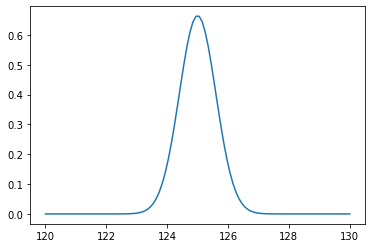

In [201]:
x,y=gaussian_ar(125)
plt.plot(x,y)

In [318]:
def likelihood_ratio(p,q):
    return np.prod(p/q + 1e-20)

def log_likelihood_ratio(p,q):
    return np.sum(np.log(p/q + 1e-20))

def weighted_llr(p,q):
    x = q * np.log(p/q + 1e-20)
    x = np.sum(x)
    return x
    
def kullback_leibler_div(p,q): 
    x = q * np.log(p/q + 1e-20)
    x = -1 * np.sum(x)
    return x

def cross_entropy(p,q):
    x = q * np.log(p + 1e-20)
    x = -1*np.sum(x)
    return x

In [342]:
def gaussian_array(mu, sig=0.6,size=1000):
    x=np.linspace(mu-10,mu+10,size)
    ga = 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
    return x, ga

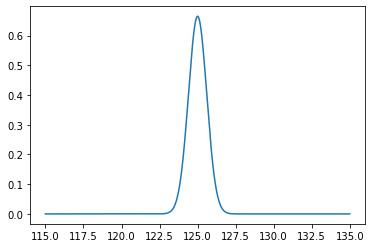

In [349]:
x1,y1=gaussian_array(125)
plt.plot(x1,y1)


In [164]:
cross_entropy(gaussian_ar(400)[1],gaussian_ar(125)[1])

8.99031780344286

In [299]:
def gaussian_arrays(mu1,mu2, sig=0.6,size=100):
    mu11 = min(mu1, mu2)
    mu22 = max(mu1, mu2)
    x=np.linspace(mu11-10,mu22+10,size)
    ga1 = 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu11)/sig, 2.)/2)
    ga2 = 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu22)/sig, 2.)/2)
    return x, ga1,ga2

10.555489906847466

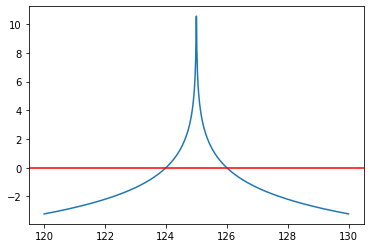

In [379]:
def distance(variable,goal):
    return -np.log((variable-goal)**2 + 1e-6)

space = np.linspace(125-5, 125+5,1000)
goal = np.ones(1000)*125
plt.plot(space, distance(space,goal))
plt.axhline(0, c='r')

distance(space,goal).max()

Experience(state=array([-0.761924  , -0.674342  , -0.715526  ,  0.77795333]), action=array([-0.33189586,  0.29719117, -0.17558391,  0.34363604]), reward=-20, new_state=array([-0.761924  , -0.674342  , -0.715526  ,  0.77795333]), done=False)